In [1]:
!git clone https://github.com/mabhay3420/Deep-Into-CNN.git

Cloning into 'Deep-Into-CNN'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [79]:
df = pd.read_csv('Deep-Into-CNN/Datasets/diabetes2.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

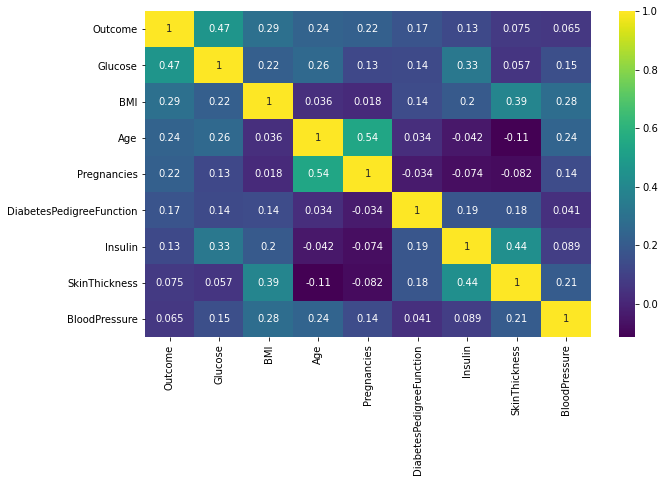

In [8]:
k = 9
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f344fe90ed0>,
      dtype=object)

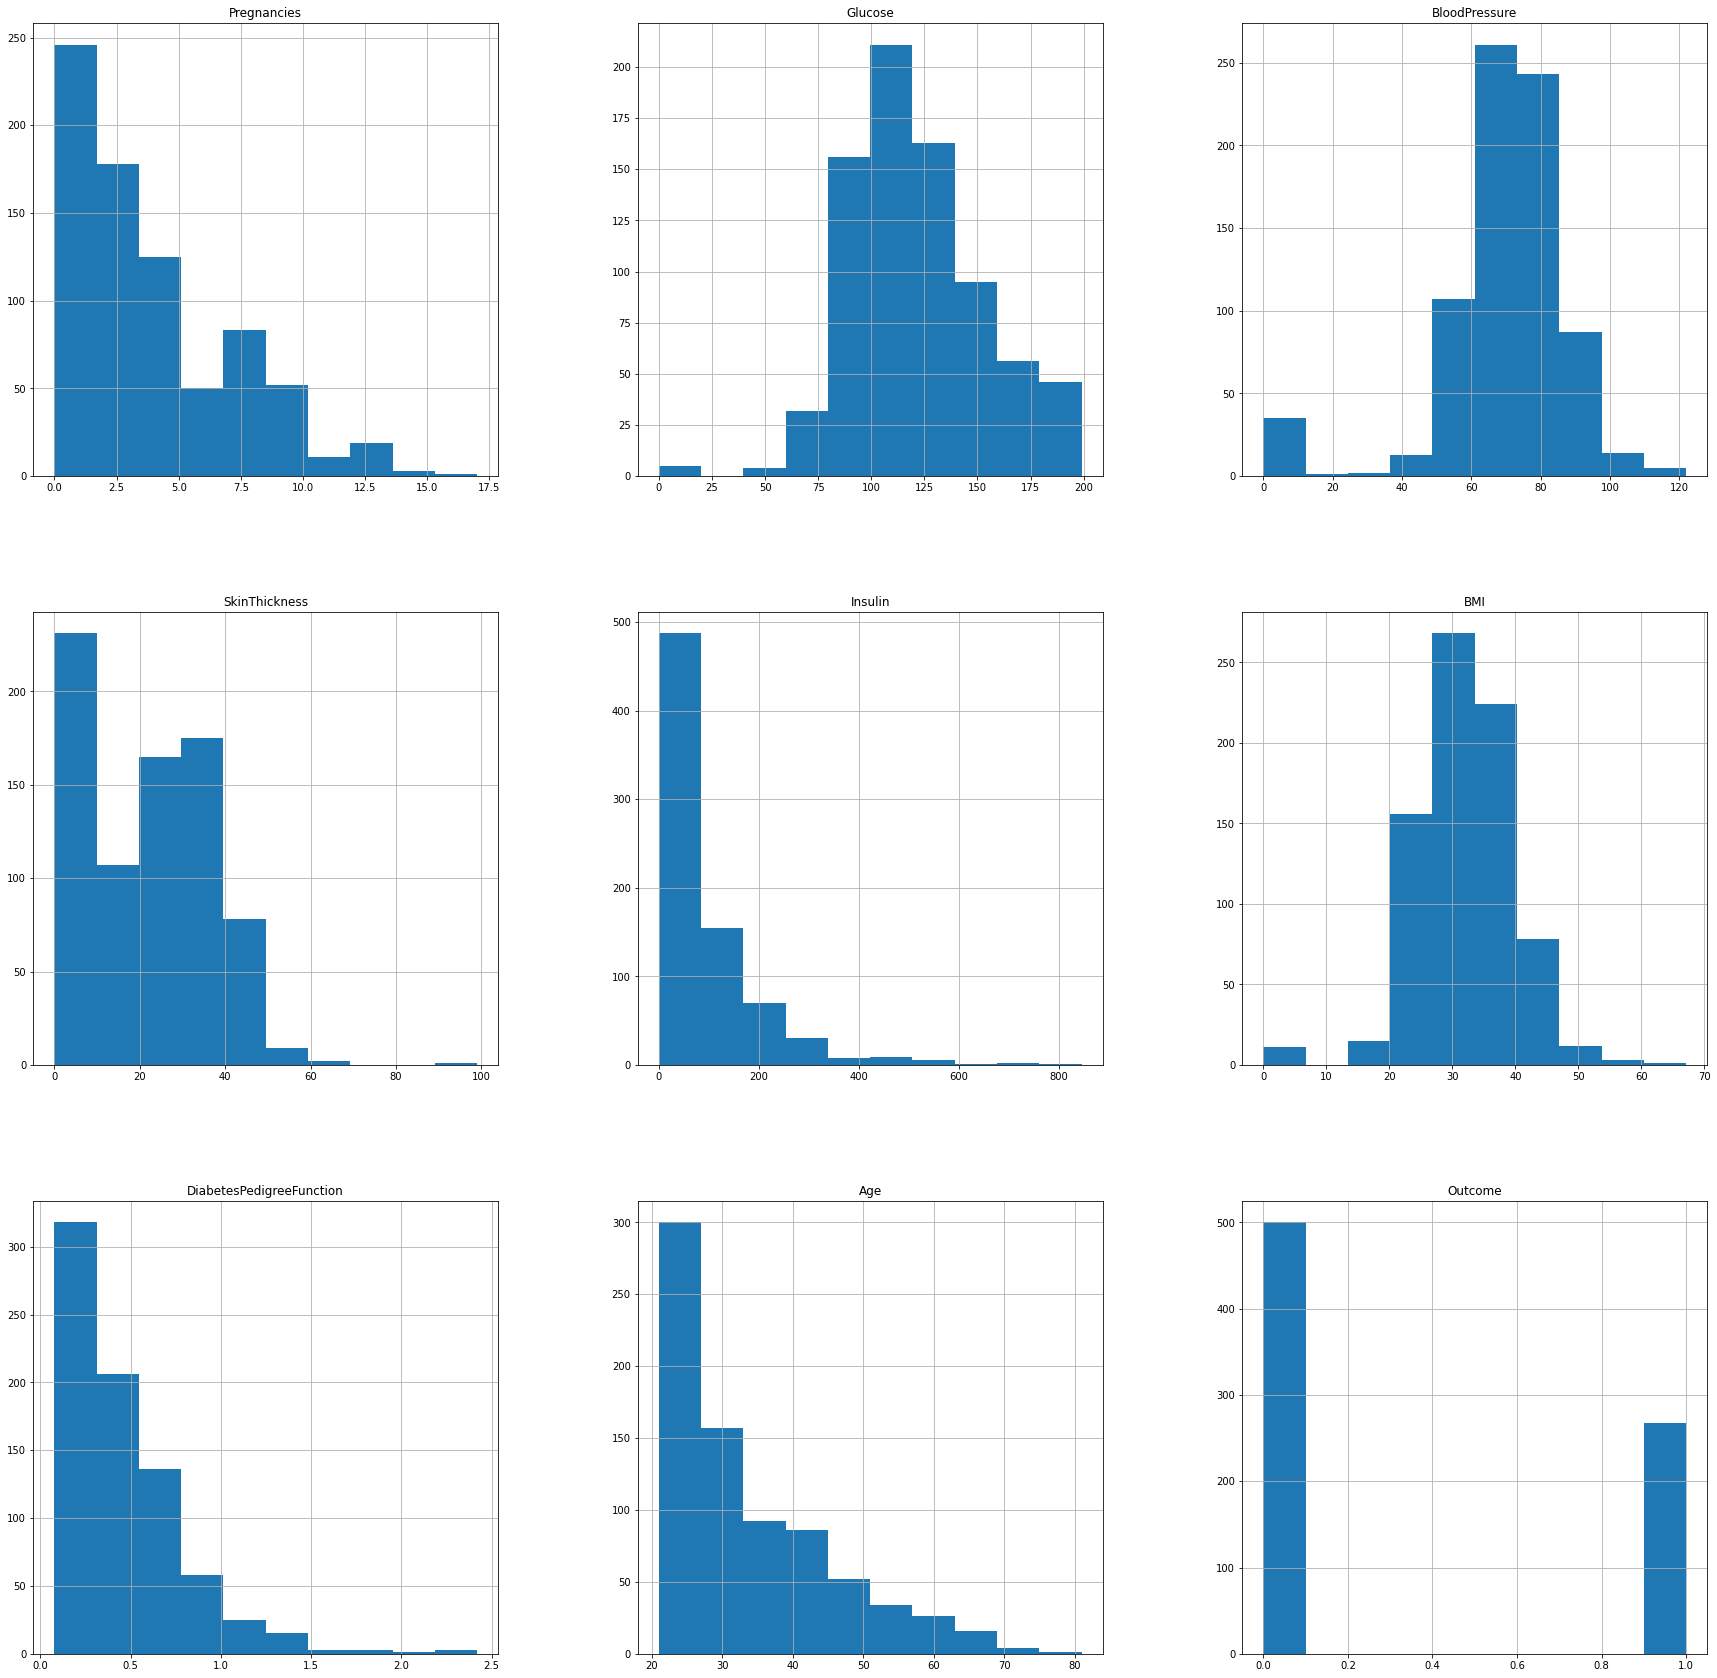

In [9]:
df.hist(figsize = (30,30))

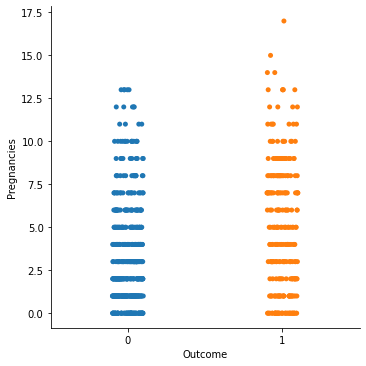

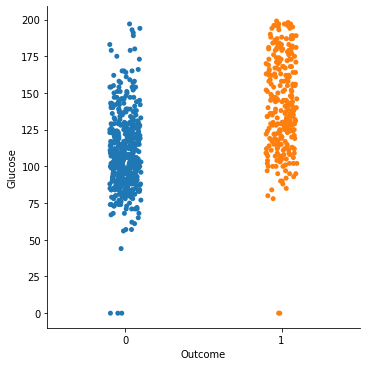

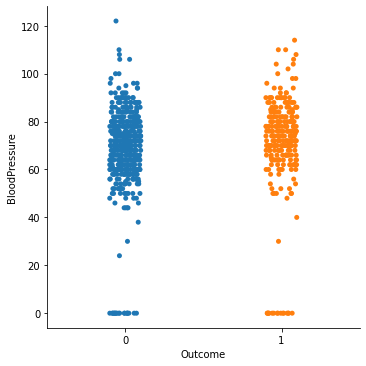

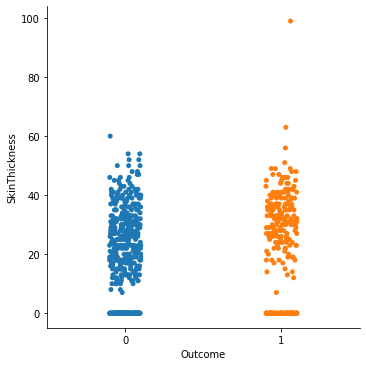

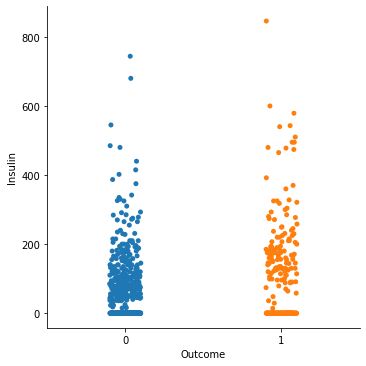

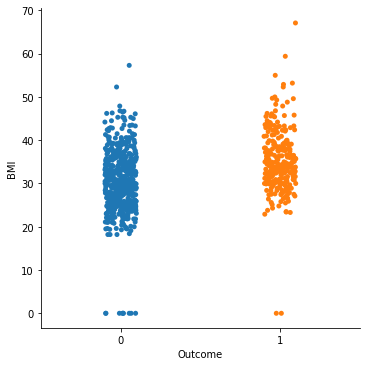

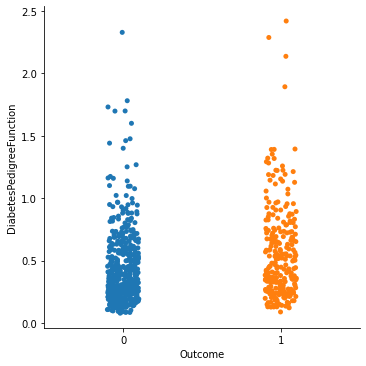

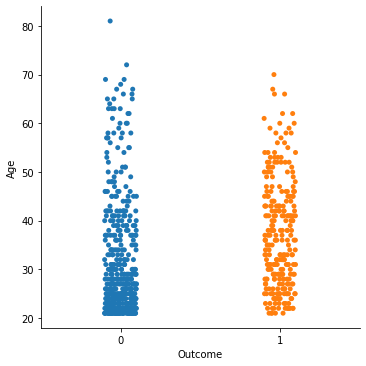

In [10]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

Several values of 0 observed in Glucose,BMI,Insulin, BloodPressure, SKin Thickness.
Replace them by NaN values

In [80]:
columns = ['Glucose','BMI','BloodPressure','SkinThickness','Insulin']
for col in columns:
  df[col].replace(0,np.NaN,inplace = True)

In [59]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [81]:
#Filling the NaN values by median
df['Glucose'] = df['Glucose'].fillna(value = df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(value = df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(value = df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(value = df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(value = df['BMI'].median())

In [82]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [63]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,14.35000,25.00000,29.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,140.671875,86.383060,14.000,50.00000,121.50000,125.0000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.455208,6.875177,18.200,22.23500,27.50000,32.3000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [83]:
df['BMI_NEW'] = pd.cut(df['BMI'],bins = [0,18.5,24.9,29.9,100],labels=["Underweight","Normal","Overweight","Obese"])
df['GlucoseGroup'] = pd.cut(df['Glucose'] , bins=[0,139,200] , labels = ["Normal","Diabetic"])
df['BloodPressureGroup'] = pd.cut(df['BloodPressure'], bins=[0,79,89,123],labels = ["Normal","High","Very High"])

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_NEW,GlucoseGroup,BloodPressureGroup
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,Diabetic,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Diabetic,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Normal,Normal


In [66]:
df['GlucoseGroup'].value_counts()

Normal      571
Diabetic    197
Name: GlucoseGroup, dtype: int64

In [84]:
df['GlucoseGroup'] = df['GlucoseGroup'].map({'Normal': 1, 'Diabetic': 0})


In [85]:
df['Obese'] = 0
df['Overweight'] = 0
df['Normal_BMI'] = 0
df['BP_Normal'] = 0
df['BP_High'] = 0
df['BP_VH'] = 0

In [86]:
for i in range(768):
  if df['BMI_NEW'][i] == "Obese":
    df['Obese'][i] = 1
for i in range(768):
  if df['BMI_NEW'][i] == "Overweight":
    df['Overweight'][i] = 1
for i in range(768):
  if df['BMI_NEW'][i] == "Normal":
    df['Normal_BMI'][i] = 1

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_NEW,GlucoseGroup,BloodPressureGroup,Obese,Overweight,Normal_BMI,BP_Normal,BP_High,BP_VH
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,0,Normal,1,0,0,0,0,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,1,Normal,0,1,0,0,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,0,Normal,0,0,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,1,Normal,0,1,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,1,Normal,1,0,0,0,0,0


In [87]:
for i in range(768):
  if df['BloodPressureGroup'][i] == "Normal":
    df['BP_Normal'][i] = 1
  elif df['BloodPressureGroup'][i] == "High":
    df['BP_High'][i] = 1
  else:
    df['BP_VH'][i] = 1

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_NEW,GlucoseGroup,BloodPressureGroup,Obese,Overweight,Normal_BMI,BP_Normal,BP_High,BP_VH
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,0,Normal,1,0,0,1,0,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,1,Normal,0,1,0,1,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,0,Normal,0,0,1,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,1,Normal,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,1,Normal,1,0,0,1,0,0


In [88]:
df['BP_VH'].value_counts()

0    708
1     60
Name: BP_VH, dtype: int64

In [89]:
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [90]:
df = df.drop(['GlucoseGroup','BloodPressureGroup','BMI_NEW'],axis = 1)

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obese,Overweight,Normal_BMI,BP_Normal,BP_High,BP_VH,New_SkinThickness
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,0,0,1,0,0,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1,0,1,0,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,0,1,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0,0,1,0,0,0


In [92]:
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for column in columns:
  df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obese,Overweight,Normal_BMI,BP_Normal,BP_High,BP_VH,New_SkinThickness
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1,1,0,0,1,0,0,0
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0,0,1,0,1,0,0,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1,0,0,1,1,0,0,0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0,1,0,1,0,0,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,1,0,0,1,0,0,0


In [95]:
X = df.drop("Outcome",axis = 1)
y = df.Outcome

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [100]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[83 18]
 [23 30]]
0.7830188679245284


In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

[[85 16]
 [26 27]]
0.7657657657657657


In [112]:
logreg = LogisticRegression()
clf = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.714
LogisticRegression log_loss is 0.529
LogisticRegression auc is 0.783


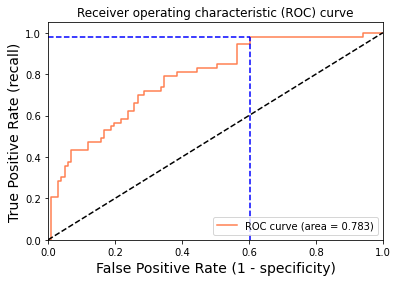

Using a threshold of 0.154 guarantees a sensitivity of 0.981 and a specificity of 0.396, i.e. a false positive rate of 60.40%.


In [106]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [107]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.770
LogisticRegression average log_loss is 0.474
LogisticRegression average auc is 0.835


In [108]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.770 (+/-0.043)
LogisticRegression average log_loss: 0.474 (+/-0.048)
LogisticRegression average auc: 0.835 (+/-0.047)


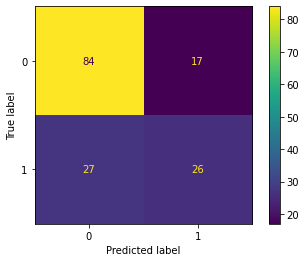

In [113]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)